In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

11501568/11490434 [==============================] - 0s 0us/step


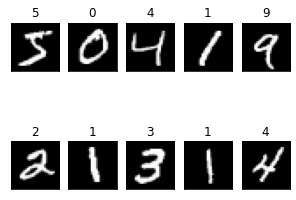

In [3]:
fig = plt.figure(figsize=(5, 4))
for idx in np.arange(10):
    ax=fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[idx].reshape(28,28), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

In [4]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu)(inputs)
x =  tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu)(x)
x =  tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu)(x)
x =  tf.keras.layers.MaxPool2D((2, 2))(x)
x =  tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(84, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          18496 

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [6]:
model.compile(optimizer=opt,
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, epochs=2, verbose=2)

Epoch 1/2
1875/1875 - 18s - loss: 0.1988 - accuracy: 0.9369 - 18s/epoch - 9ms/step
Epoch 2/2
1875/1875 - 5s - loss: 0.0571 - accuracy: 0.9828 - 5s/epoch - 3ms/step


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Eval accuracy using Keras is %.2f" %(test_acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9865
Eval accuracy using Keras is 98.65
